#### PER 주가수익비율

* "이 주식은 비싼가, 주식시장이 거품인가" 판단하는 시금석
* PER = 주식가격 / 주당순이익(EPS)

물건을 살 때 값을 얼마나 줘야 좋은 건지 판단할 기준은 수없이 많다. 내게 얼마나 절실한가. 이 물건이 얼마나 유용하고 값어치가 있나. 혹은 어느 정도나 오래 사용할 수 있나. 물건에 대한 다른 사람들의 평판은 어떤가. 물건이 내게 주는 수익은 어느 정도인가…. 생각해보면 쉽게 떠오르는 이런저런 이유들은 어려운 주식투자나, 투자결정에도 그대로 적용된다.

이런 점에서 흔히 투자자들 사이에서 `퍼(PER)`로 불리는 **주가수익비율(Price earning ratio, 이하 PER)**은 어떤 회사의 주식가치, 더 나아가 전체 주식시장의 가치가 고평가 됐는지 가늠할 수 있는 유용한 잣대다. **PER은 현재 시장에서 매매되는 특정회사의 주식가격을 주당순이익으로 나눈 값을 말한다.** 한 주에 만 원하는 회사주식이 1년에 주당 1000원의 순이익을 낸다면? PER은 10이 된다. 이 수치가 회사의 가치를 어떻게 반영한다는 얘기일까?

In [ ]:
! pip install PyMySQL

     |████████████████████████████████| 43 kB 1.4 MB/s 


In [ ]:
import pymysql.cursors
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )
cursor = connection.cursor()

In [ ]:
# 실행할 SQL 쿼리
# IT서비스주의 2019년 분기별
"""   1분기
      AND T2.DT >= '2019-01-01'
      AND T2.DT <= '2019-03-31'
      2분기
      AND T2.DT >= '2019-04-01'
      AND T2.DT <= '2019-06-30'
      3분기
      AND T2.DT >= '2019-07-01'
      AND T2.DT <= '2019-09-30'
      4분기
      AND T2.DT >= '2019-10-01'
      AND T2.DT <= '2019-12-31'
"""
sql = """
      SELECT T1.STK_CD, T1.STK_NM, T1.SEC_NM, T1.EX_CD
              ,T2.DT, O_PRC, T2.L_PRC, T2.H_PRC, T2.C_PRC, T2.VOL
              ,M5_PRC , M10_PRC, M20_PRC
              , T3.FIN_ITM_VAL
      FROM stock T1
      INNER JOIN HISTORY_DT T2
      ON (T2.STK_CD = T1.STK_CD)
      INNER JOIN FINANCE_Y T3
      ON (T2.STK_CD = T3.STK_CD)
      WHERE T1.SEC_NM = 'IT서비스'
      AND T1.EX_CD = 'KP'
      AND T2.DT >= '2020-01-01'
      AND T2.DT <= '2020-04-03'
      AND T3.FIN_ITM_NM = '주당순이익'
      AND T3.YY = '2019';
"""
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [ ]:
import pandas as pd

# result를 DataFrame으로 변환
df = pd.DataFrame(result)

# DT 컬럼을 날짜와 시간 타입으로 변환
df["DT"] = pd.to_datetime(df["DT"])

# O_PRC 컬럼부터 마지막 컬럼까지 정수로 변환
df.loc[: , "O_PRC":] = df.loc[: , "O_PRC":].astype(int)
#df.loc[: , "STK_CD"] = df.loc[: , "STK_CD"].astype(int)

# FIN_ITM_VAL 컬럼의 이름을 "주당순이익"으로 변환
df.rename(columns={"FIN_ITM_VAL":"주당순이익"}, inplace=True)

# 종가/주당순이익 으로 PER 계산
df["PER"] = df["C_PRC"] / df["주당순이익"]

In [ ]:
# df.groupby(['STK_NM'], as_index=False).mean() 그룹별 분기 평균
# 거래일 DT를 인덱스로 설정 합니다
# df = df.set_index("DT")
# kakao_df = df[df["STK_NM"] == "카카오"]
# kakao_df[["STK_CD",	"STK_NM","PER"]].plot(figsize=(15, 5))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STK_CD   3085 non-null   object        
 1   STK_NM   3085 non-null   object        
 2   SEC_NM   3085 non-null   object        
 3   EX_CD    3085 non-null   object        
 4   DT       3085 non-null   datetime64[ns]
 5   O_PRC    3085 non-null   int64         
 6   L_PRC    3085 non-null   int64         
 7   H_PRC    3085 non-null   int64         
 8   C_PRC    3085 non-null   int64         
 9   VOL      3085 non-null   int64         
 10  M5_PRC   3085 non-null   int64         
 11  M10_PRC  3085 non-null   int64         
 12  M20_PRC  3085 non-null   int64         
 13  주당순이익    3085 non-null   int64         
 14  PER      3085 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(9), object(4)
memory usage: 361.6+ KB


In [ ]:
# PER 비교를 위해 5개 회사의 값 추출
df_1 = pd.DataFrame(df.loc[df['STK_CD'] == '035720'])
df_2 = pd.DataFrame(df.loc[df['STK_CD'] == '267850'])
df_3 = pd.DataFrame(df.loc[df['STK_CD'] == '286940'])
df_4 = pd.DataFrame(df.loc[df['STK_CD'] == '018260'])
df_5 = pd.DataFrame(df.loc[df['STK_CD'] == '307950'])

Text(0.5, 1.0, '2019 PER')

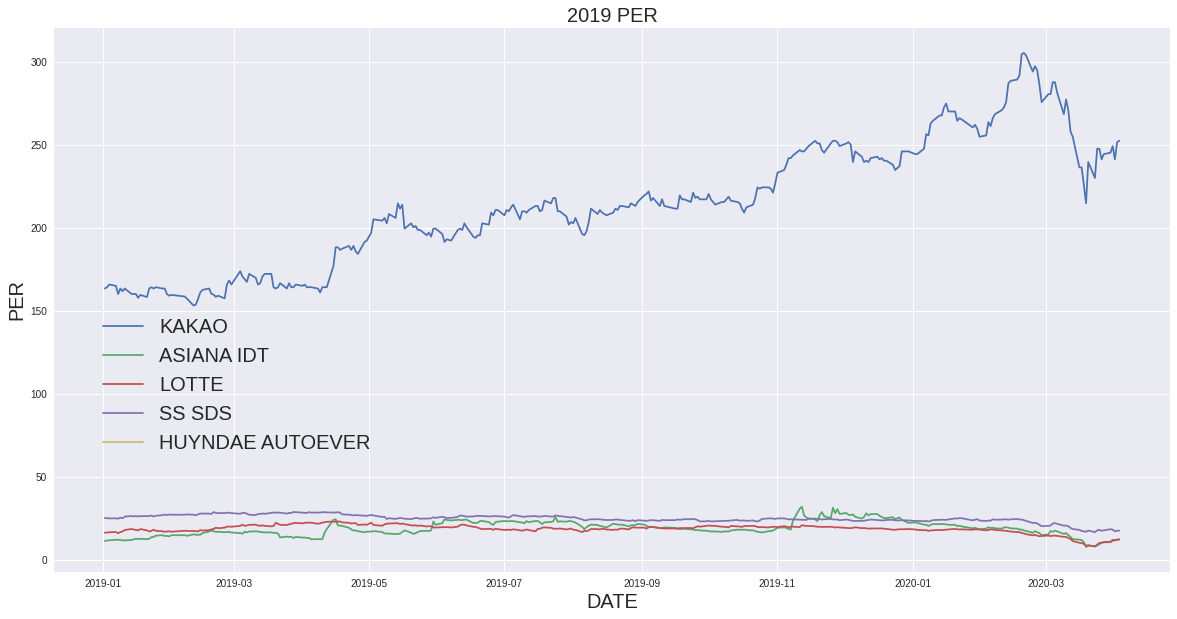

In [ ]:
#PER 그래프를 추가하고 범례
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use("seaborn")
plt.figure(figsize=(20,10))
plt.plot(df_1['DT'], df_1['PER'], label = 'KAKAO')
plt.plot(df_2['DT'], df_2['PER'], label = 'ASIANA IDT')
plt.plot(df_3['DT'], df_3['PER'], label = 'LOTTE')
plt.plot(df_4['DT'], df_4['PER'], label = 'SS SDS')
plt.plot(df_5['DT'], df_5['PER'], label = 'HUYNDAE AUTOEVER')

plt.legend(bbox_to_anchor=(0.3, 0.5), fontsize = 20)

#plt.axvline(x=datetime(2020, 4, 3), color='r', linestyle='--', linewidth=3)
#plt.axvline(x=datetime(2020, 9, 4), color='b', linestyle='--', linewidth=3)

plt.xlabel("DATE", fontsize = 20)
plt.ylabel("PER", fontsize = 20)
plt.title("2019 PER", fontsize = 20)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.4%20%EC%B6%94%EC%84%B8%20%EC%A7%80%ED%91%9C%20MACD-output.ipynb)


# MACD(Moving Average Convergence and Divergence)

MACD는 이동평균 수렴확산 지수(移動平均 收斂擴散 指數, 영어: moving average convergence divergence)의 약자로 1970년대 후반에 제럴드 아펠(Gerald Appel)이 만든 주가의 기술적 분석에 사용되는 지표이다. MACD는 주가 추세의 강도, 방향, 모멘텀 및 지속 시간의 변화를 나타내도록 설계되었다.

MACD는 과거의 가격 데이터(대부분 증가)로부터 계산된 세 가지 시계열의 모음이다. 이러한 세 가지 시계열은 MACD 고유의 "신호", "평균", "확산"이다. MACD는 장기 지수이동평균과 단기 지수이동평균 간의 차이이다. 평균은 MACD 자체의 지수이동평균이다.

* 출처 : [MACD - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/MACD)

주가의 단기 이동평균선과 장기 이동평균선의 수렴과 확산을 나타내는 지표이다. 단기 이동평균선과 장기 이동평균선이 주가의 변동으로 인해 수렴과 확산을 반복한다는 원리에 기반을 두고 두 이동평균선의 차이가 가장 큰 시점을 찾아내 추세 변화의 신호로 삼는 지표이다. MACD는 크게 MACD 선과 시그널선(signal line)으로 구성된다. **MACD 선은 단기 지수이동평균과 장기 지수이동평균의 차이로 구해지며 일반적으로 단기 이동평균선의 경우 12일, 장기 이동평균선의 경우 26일이 이용된다.** <font color="red">단기 지수이동평균이 장기 지수이동평균보다 위쪽에 위치하면 MACD선은 양수가 되고 이것은 주가가 상승하는 신호로 여겨진다.</font>  반대로 <font color="blue">단기 지수이동평균이 장기 지수이동평균보다 아래쪽에 있으면 MACD 선은 음수가 되고 이것은 주가가 하락하는 신호로 여겨진다.</font> 

시그널선은 일정 기간 동안의 MACD지수 이동평균으로 정의되며 일반적으로 MACD의 9일 지수이동평균이 이용된다. 즉 12일 동안의 지수이동평균과 26일 동안의 지수이동평균을 구한 후 이들 간의 차이를 다시 9일 동안의 지수이동평균으로 산출하는 것이다. MACD선과 시그널선이 교차하는 시점이 바로 단기 이동평균과 장기 이동평균간의 차이가 가장 큰 것으로 간주된다. 그래서 MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호, 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호로 해석된다.

MACD는 추세 전환 시점을 예측하기보다 **추세의 방향과 주가의 움직임을 분석하는 데 유용한 지표**로 평가된다.

[네이버 지식백과] MACD [Moving Average Convergence and Divergence] (두산백과)

* 출처 : https://terms.naver.com/entry.nhn?docId=5868194&cid=40942&categoryId=31830

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/MACDpicwiki.gif">

이미지 출처 : [MACD - Wikipedia](https://en.wikipedia.org/wiki/MACD)

## MACD의 세가지 지표
1. MACD = 12일 이동평균선 - 26일 이동평균선
2. MACD Signal = MACD의 9일 이동평균선
3. 0선 = 지표값의 양/음을 나타내는 기준석(직선)


## MACD 값에 따른 의미와 매매지표
1. MACD > 0 : 주가 상승 추세 (12일선이 26일선 위에 위치)
2. MACD < 0 : 주가 하락 추세 (12일선이 26일선 아래에 위치)
3. MACD와 signal이 골든크로스 = OSC가 0 위로 돌파 : 단기적 주가 상승 국면
4. MACD와 signal이 데드크로스 = OSC가 0 아래로 돌파 : 단기적 주가 하락 국면

In [ ]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
# import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

# 그래프 스타일 설정
# plt.style.use("seaborn")

## 개별종목 일별시세 가져오기

In [ ]:
#실행할 SQL 31 30 30 31
# 2019년 1월 1일 ~ 2020년 12월 31일 삼성전자의 종가,시가,고가,저가, 거래량조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC, T1.O_PRC, T1.H_PRC, T1.L_PRC, T1.VOL
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '005930'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2020-09-04'
"""
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

# result를 DataFrame으로 변환
df = pd.DataFrame(result)

# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

# C_PRC 컬럼부터 마지막 컬럼까지의 타입을 정수로 변환
df.loc[: , "C_PRC" : ] = df.loc[: , "C_PRC" : ].astype(int)

## 지수이동평균 구하기
* 단순이동평균선은 추세전환 신호가 늦게 나타난다는 단점이 있기 때문에 이를 해결하기 위해서 MACD에서는 지수이동평균을 사용합니다.
* 단순이동 평균과 지수 이동 평균 : https://www.cmegroup.com/ko/education/learn-about-trading/courses/technical-analysis/understanding-moving-averages.html#

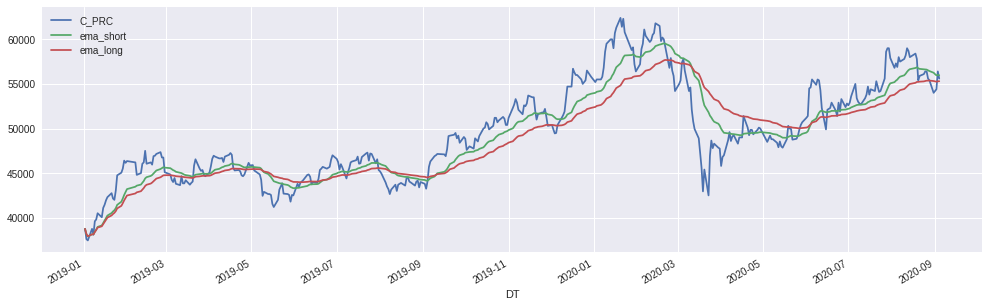

In [ ]:
# 12일 지수이동평균을 구합니다.
short = 12
df["ema_short"] = df["C_PRC"].ewm(short).mean()

# 26일 지수이동평균을 구합니다.
long = 26
df["ema_long"] = df["C_PRC"].ewm(long).mean()

# 거래일 DT를 인덱스로 설정 합니다
df = df.set_index("DT")

# "C_PRC", "ema_short" (12일 지수 이동평균), "ema_long"(26일 지수 이동 평균) 을 시각화 합니다.
df[["C_PRC", "ema_short", "ema_long"]].plot(figsize=(15, 5))

## MACD값 구하기

## MACD 값에 따른 의미와 매매지표
1. MACD > 0 : 주가 상승 추세 (12일선이 26일선 위에 위치)
2. MACD < 0 : 주가 하락 추세 (12일선이 26일선 아래에 위치)
3. MACD와 signal이 골든크로스 = OSC가 0 위로 돌파 : 단기적 주가 상승 국면
4. MACD와 signal이 데드크로스 = OSC가 0 아래로 돌파 : 단기적 주가 하락 국면

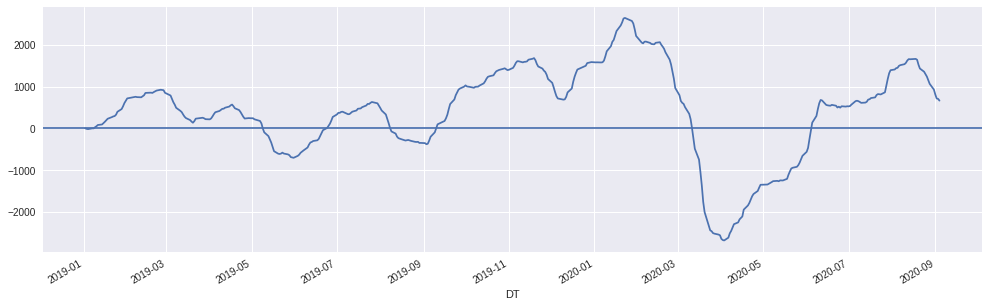

In [ ]:
# MACD = 단기 지수이동평균(12일 지수 이동 평균) - 장기 지수이동평균 (26일 지수 이동 평균)
df["MACD"] = df["ema_short"] - df["ema_long"]

# MACD 값 시각화
df["MACD"].plot(figsize=(15, 5))

# 0 지점에 선을 그림
plt.axhline(0)

## MACD 시각화 

* MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호
* 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호
* (주의 : 매수 신호와 매도 신호는 지표에서 데이터를 보는 기준이기 때문에 실제 거래와는 맞지 않을 수 있습니다.)

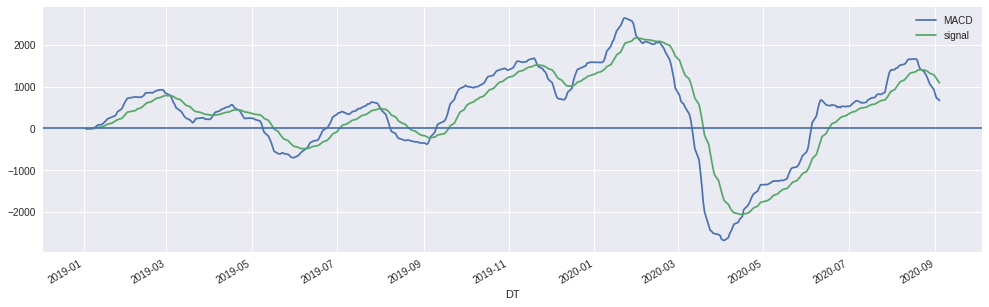

In [ ]:
# MACD의 9일 이동평균값을 구합니다.
df["signal"] = df["MACD"].ewm(9).mean()

# MACD 와 9일 이동 평균 signal 시각화

# MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호
# 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호
df[["MACD", "signal"]].plot(figsize=(15, 5))

# 0에 선을 그림
plt.axhline(0)

## MACD oscillator 값 구하기
* 볼린저 밴드의 %B 값
* RSI의 signal 값
* macdhist 값은 오실레이터(oscillator) 와 유사합니다.
* 기준선을 중심으로 아래위로 움직이는 성질을 갖는 지표를 오실레이터라 한다. 대개 추세 변화를 빨리 감지하려는 목적이며, 그래프의 기울기(변화량)를 측정하는 것과 비슷하다. 출처 : [스토캐스틱 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%86%A0%EC%BA%90%EC%8A%A4%ED%8B%B1)

* https://www.nanumtrading.com/fx-%EB%B0%B0%EC%9A%B0%EA%B8%B0/%EC%B0%A8%ED%8A%B8-%EB%B3%B4%EC%A1%B0%EC%A7%80%ED%91%9C-%EC%9D%B4%ED%95%B4/04-%EC%8A%A4%ED%86%A0%EC%BA%90%EC%8A%A4%ED%8B%B1/

<BarContainer object of 416 artists>

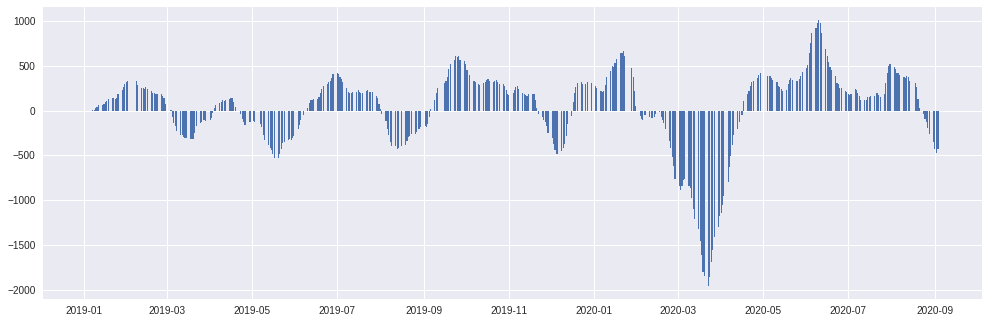

In [ ]:
# MACD oscillator 계산
df["macdhist"] = df["MACD"] - df["signal"]

plt.figure(figsize=(15,5))
# MACD oscillator  시각화
plt.bar(df.index, df.macdhist)

## MACD 시각화 함수 만들기

## plotly를 통한 시각화

In [ ]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
!pip install plotly --upgrade

### plotly.express 로 간단하게 시각화 하기

In [ ]:
# plotly.express 로드하기
import plotly.express as px

# 주식의 시가, 고개, 저가, 종가 시각화
px.line(df[["O_PRC","H_PRC","L_PRC","C_PRC"]], title="OHLC")

In [ ]:
# "MACD", "signal" 을 시각화 합니다.
px.line(df[["MACD", "signal"]], title="MACD", height=500)

In [ ]:
# 막대그래프로 macdhist 를 시각화 합니다.
px.bar(df["macdhist"], height=300)

In [ ]:
# plotly의 subplots, graph_objects 로드하기
import plotly.graph_objects as go
from plotly import subplots

In [ ]:
# 시가 종가 저가 고가를 나타내는 봉차트
candlestick = go.Candlestick(x=df.index, 
                             open=df.O_PRC, 
                             high=df.H_PRC, 
                             low=df.L_PRC, 
                             close=df.C_PRC)

# MACD 선차트
macd = go.Scatter(x=df.index, y=df["MACD"], name="MACD")

# signal 선차트
signal = go.Scatter(x=df.index, y=df["signal"], name="signal")

# macdhist 막대 차트
oscillator = go.Bar(x=df.index, y=df["macdhist"], name="oscillator")

# 거래량 막대 차트
trade_volume = go.Bar(x=df.index, y=df["VOL"], name="거래량")


In [ ]:
# make_subplots을 통해 4개의 행과 1개의 컬럼을 갖는 서브플롯을 생성합니다.
# append_trace 를 통해 fig 변수 안에 시각화 하고자 하는 그래프를 넣어줍니다.

# 4줄 1칸의 그래프 생성
fig = subplots.make_subplots(rows=4, cols=1)

#1번째줄 1번째 칸에 봉차트
fig.append_trace(candlestick, 1, 1)

# 3번째줄 1번째 칸에 macd 차트
fig.append_trace(macd, 3, 1)

# 3번째줄 1번째 칸에 signal 차트
fig.append_trace(signal, 3, 1)

# 3번째줄 1번째 칸에 oscillator 차트
fig.append_trace(oscillator, 3, 1)


# 4번째줄 1번째 칸에 거래량 차트
fig.append_trace(trade_volume, 4, 1)
fig.show()

## MACD 값에 따른 의미와 매매지표
1. MACD > 0 : 주가 상승 추세 (12일선이 26일선 위에 위치)
2. MACD < 0 : 주가 하락 추세 (12일선이 26일선 아래에 위치)
3. MACD와 signal이 골든크로스 = OSC가 0 위로 돌파 : 단기적 주가 상승 국면
4. MACD와 signal이 데드크로스 = OSC가 0 아래로 돌파 : 단기적 주가 하락 국면

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.3%20%EB%AA%A8%EB%A9%98%ED%85%80%20%EC%A7%80%ED%91%9C%20RSI-output.ipynb)

# RSI(Relative Strength Index)

* 모멘텀 : 운동량 (運動量, 영어: momentum)은 물리학 특히, 뉴턴 역학에서 물체의 질량과 속도의 곱으로 나타내는 물리량이다


상대강도지수(相對强度指數, 영어: relative strength index, RSI)는 주식, 선물, 옵션 등의 기술적 분석에 사용되는 보조 지표이다. RSI는 가격의 상승압력과 하락압력 간의 상대적인 강도를 나타낸다. 1978년 미국의 월레스 와일더(J. Welles Wilder Jr.)가 개발했다.


RSI는 일정 기간 동안 주가가 전일 가격에 비해 상승한 변화량과 하락한 변화량의 평균값을 구하여, 상승한 변화량이 크면 과매수로, 하락한 변화량이 크면 과매도로 판단하는 방식이다.

계산 방법은 다음과 같다. 주어진 기간의 모든 날의 주가에 대해서

* 가격이 전일 가격보다 상승한 날의 상승분은 U(up) 값이라고 하고,
* 가격이 전일 가격보다 하락한 날의 하락분은 D(down) 값이라고 한다.
* U값과 D값의 평균값을 구하여 그것을 각각 AU(average ups)와 AD(average downs)라 한다.
*  AU를 AD값으로 나눈 것을 RS(relative strength) 값이라고 한다. RS 값이 크다는 것은 일정 기간 하락한 폭보다 상승한 폭이 크다는 것을 의미한다.
다음 계산에 의하여 RSI 값을 구한다.


* RSI 계산 공식 :
    * RS = AU / AD
    * RSI = RS / (1 + RS) = AU / (AU + AD)

대체로 이 값은 백분율로 나타낸다.

이 지표의 파라메터로는 기간을 며칠 동안으로 할 것인가가 있다. Welles Wilder는 14일을 사용할 것을 권유했다. 대체로 사용되는 값은 9일, 14 ~ 15일, 25 ~ 28일 등이다.

RSI 그래프는 이동평균선을 함께 나타내는 것이 보통이며, 이동평균선을 며칠선으로 할 것인가 역시 파라메터로 주어진다. RSI를 15일에 대하여 구하고 5일 이동평균선을 함께 표시하는 경우 그래프에 (15, 5)라고 표시해주는 것이 일반적이다.

유사한 지표로는 스토캐스틱이 있다. RSI 그래프의 형태는 fast stochastic과 비슷하게 나온다.


출처 : https://ko.wikipedia.org/wiki/RSI_(%ED%88%AC%EC%9E%90%EC%A7%80%ED%91%9C)

* 지표의 파라메터를 14일로 했을 때
    * RSI = 14일의 상승폭 합계 / (14일의 상승폭 합계 + 14일의 하락폭 합)
    * 수식에 따라 RSI 는 0~1 사이의 값 만을 가지게 됩니다.
    * 만일 14일 동안 매일 상승하게 되면 1이 나오고 14일 동안 매일 하락하게 되면 0이 나옵니다.
    * 보통 0.7이 과열, 0.3이 침체로 봅니다.

* https://web.archive.org/web/20180330212602/http://traderk10.tistory.com/119

## RSI 계산 공식
1. U = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
2. D = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
3. AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
4. AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
5. RS = AU / AD
6. RSI = AU / (AU+AD) = RS / (1+RS)
7. RSI 시그널 = RSI의 이동평균선 (6일의 이동평균선 사용)

In [ ]:
# 그래프 스타일 설정
plt.style.use("seaborn")

In [ ]:
#실행할 SQL
# 2019년 1월 1일 ~ 2020년 12월 31일 카카오의 종가,시가,고가,저가, 거래량조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC, T1.O_PRC, T1.H_PRC, T1.L_PRC, T1.VOL
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '035720'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2020-09-04'
"""
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

# result를 DataFrame으로 변환
df = pd.DataFrame(result)

# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

# C_PRC 컬럼부터 마지막 컬럼까지의 타입을 정수로 변환
df.loc[: , "C_PRC" : ] = df.loc[: , "C_PRC" : ].astype(int)

# diff() : 함수는 윗줄 (하루전) 데이터와 아래줄 데이터(현재)의 차를 계산
df["diff"] = df["C_PRC"].diff()

In [ ]:
def UD(diff):
    """
    diff 값을 입력받아 0이면 ups, downs을 0으로 
    0보다 크면 ups 에 diff값을 작으면 downs 에 abs(diff) 값을 반환합니다.
    ups = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
    downs = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
    """
    ups = 0
    downs = 0
    # 전날주가 - 오늘주가가 0 초과
    if diff > 0:
        # 상승치를 ups에 대입
        ups = diff
    elif diff < 0: # 전날주가 - 오늘주가가 0 미만
        # 하락치의 절대값 (abs)를 downs 에 대입
        downs = abs(diff)
    # ups와 downs 를 Series(DataFrame 칸) 으로 만들어서 리턴    
    return pd.Series([ups, downs])

In [ ]:
# diff() : 함수는 윗줄 (하루전) 데이터와 아래줄 데이터(현재)의 차를 계산
df["diff"] = df["C_PRC"].diff()

# df["diff"] 컬럼 데이터에 UD 함수를 실행해서 상승분과 하락분을 계산하고
# 상승분은 U, 하락분은 D 컬럼에 저장
df[["U", "D"]] = df["diff"].apply(UD)

# AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
df["AU"] = df["U"].rolling(14).mean()

# AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
df["AD"] = df["D"].rolling(14).mean()

# RS = AU / AD
# RSI = AU / (AU+AD) = RS / (1+RS)
# RS = AU(일정기간(N일,보통14일) 동안의 U의 평균값(average ups) ) / AD (일정기간(N일,보통14일) 동안의 D의 평균값(average downs))
df["RS"] = df["AU"] / df["AD"]


In [ ]:
#  df["diff"] 컬럼 데이터에 UD 함수를 실행해서 상승분과 하락분을 계산하고
# 상승분은 U, 하락분은 D 컬럼에 저장
df[["U", "D"]] = df["diff"].apply(UD)

# AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
df["AU"] = df["U"].rolling(14).mean()

# AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
df["AD"] = df["D"].rolling(14).mean()

# RS = AU / AD
# RSI = AU / (AU+AD) = RS / (1+RS)
# RS = AU(일정기간(N일,보통14일) 동안의 U의 평균값(average ups) ) 
#      / AD (일정기간(N일,보통14일) 동안의 D의 평균값(average downs))
df["RS"] = df["AU"] / df["AD"]

# RSI = AU / (AU+AD) = RS / (1+RS)
df["RSI"] = df["RS"] / (1 + df["RS"])

# RSI_signal 변수를 생성합니다.
df['RSI_signal'] = df["RSI"].rolling(6).mean()

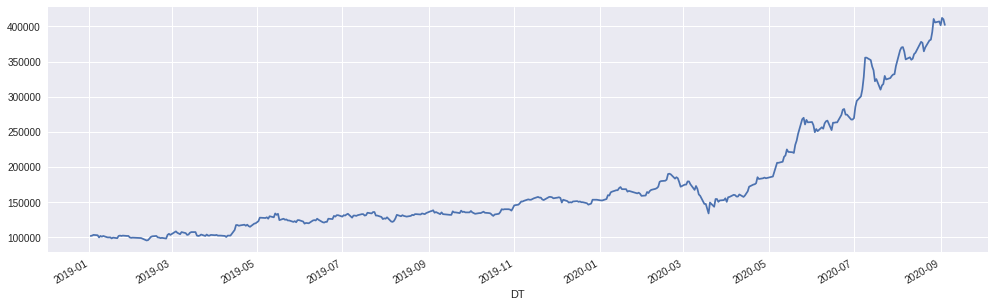

In [ ]:
#AU / (AU+AD) = RS / (1+RS)
df["RSI"] = df["RS"] / (1 + df["RS"])

# RSI_signal 변수를 생성합니다.
df['RSI_signal'] = df["RSI"].rolling(6).mean()

# DT 컬럼 (날짜) 를 인덱스로 설정
df = df.set_index("DT")

# RSI와 비교해 보기 위해 종가를 시각화 합니다.
df["C_PRC"].plot(figsize=(15, 5))

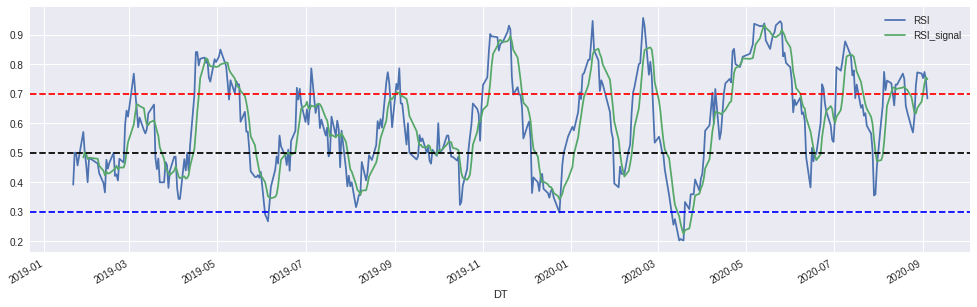

In [ ]:
# 'RSI','RSI_signal' 을 시각화 합니다.
df[["RSI", "RSI_signal"]].plot(figsize=(15, 5))
# RSI 가 70퍼센트 지점에 빨강색 선 ->  RSI가 70% 이상이면 매수세가 상당히 커서 초과매수 국면에 돌입했다고 판단합니다.
plt.axhline(0.7, c="r", ls="--")
# RSI 가 50 퍼센트 지점에 검정색 선 -> RSI는 50%를 기준으로, 50% 이상은 매수세 우세, 50% 이하는 매도세 우세를 나타냅니다.
plt.axhline(0.5, c="k", ls="--")
# RSI 가 30 퍼센트 지점에 파랑색 선 ->  RSI가 30% 이하이면 매도세가 상당히 커서 초과매도 국면에 돌입했다고 판단합니다.
plt.axhline(0.3, c="b", ls="--")

In [ ]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
!pip install plotly --upgrade

In [ ]:
# plotly.express 로드하기
import plotly.express as px

In [ ]:
# 0.3, 0.7 값을 컬럼으로 만들어 줍니다.
df["s3"] = 0.3
df["s7"] = 0.7

In [ ]:
df.tail()

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal,s3,s7
DT,,,,,,,,,,,,,,,,
2020-08-31,035720,407000,410500,420500,401000,1629751,1500.0,1500.0,0.0,5214.285714,1571.428571,3.318182,0.768421,0.673190,0.3,0.7
2020-09-01,035720,401500,413500,416000,400000,1100736,-5500.0,0.0,5500.0,5214.285714,1714.285714,3.041667,0.752577,0.701230,0.3,0.7
2020-09-02,035720,412000,405500,412500,401500,921655,10500.0,10500.0,0.0,5857.142857,1714.285714,3.416667,0.773585,0.735370,0.3,0.7
2020-09-03,035720,410000,415500,416000,404000,739215,-2000.0,0.0,2000.0,5392.857143,1857.142857,2.903846,0.743842,0.756213,0.3,0.7
2020-09-04,035720,402000,390000,404500,389500,1168529,-8000.0,0.0,8000.0,5250.000000,2428.571429,2.161765,0.683721,0.749028,0.3,0.7


In [ ]:
# RSI, RSI_signal, s3, s7 을 선그래프로 그림
px.line(df[["RSI", "RSI_signal", "s3", "s7"]])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 3 줄 1칸짜리 그래프 생성 
fig = make_subplots(rows=3, 
                    cols=1,
                    vertical_spacing=0.01,
                    shared_xaxes=True,
                    # 각 줄의 제목
                    subplot_titles=('<b>카카오</b>',
                                    '<b>Select Date Range!</b>',
                                    '<b>RSI & RSI signal</b>'))

fig.add_trace(    # 봉차트 추가
                   go.Candlestick(
                        x=df.index,              #날짜
                        open=df['O_PRC'],      # 시가
                        high=df['H_PRC'],     #고가
                        low=df['L_PRC'],       #저가
                        close=df['C_PRC'],   # 종가
                        increasing_line_color='red', # 상승봉의 색 설정
                        decreasing_line_color='blue' # 하락봉의 색 설정
                  ), 
                  row=1, col=1) # 1번째줄 1번째 칸에 추가

fig.add_trace(
                    # 선그래프 추가
                     go.Scatter(
                         x=df.index, #날짜
                         y=df['RSI'], # RSI
                         line=dict(color='blue'), #파란색
                         name='RSI'), # 범례
                row=3, col=1) # 3번째줄 1번째 칸에 추가

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['RSI_signal'],
                         line=dict(color='red'),
                         name='RSI_signal'), row=3, col=1)
#선그래프 추가
fig.add_trace(go.Scatter(x=df.index, #날짜
                         y=df["s3"],#s3 
                         line=dict(color='red',dash='dash'), #빨강색
                         name='Low bound'),#범례
              row=3,col=1) #3번째줄 1번째 칸에 추가

# 선그래프 추가
fig.add_trace(go.Scatter(x=df.index, #날짜
                         y=df["s7"],#s3
                         line=dict(color='blue',dash='dash'),#파랑색
                         name='High bound'), #범례
              row=3,col=1) #3번째줄 1번째 칸에 추가

# 그래프 가로 1200 세로 800 기간 슬라이더 추가
fig.update_layout(width=1200, height=800, xaxis_rangeslider_visible=True)

fig.show()

OBV

In [ ]:
plt.style.use('fivethirtyeight')
df.head()

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal,s3,s7
DT,,,,,,,,,,,,,,,,
2020-01-02,035720,152500,154000,154500,152000,241047,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7
2020-01-03,035720,152500,153500,155000,151000,314848,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7
2020-01-06,035720,154500,150500,155000,150000,393715,2000.0,2000.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7
2020-01-07,035720,160000,155000,160000,154500,840186,5500.0,5500.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7
2020-01-08,035720,159500,158500,162000,156500,851619,-500.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7


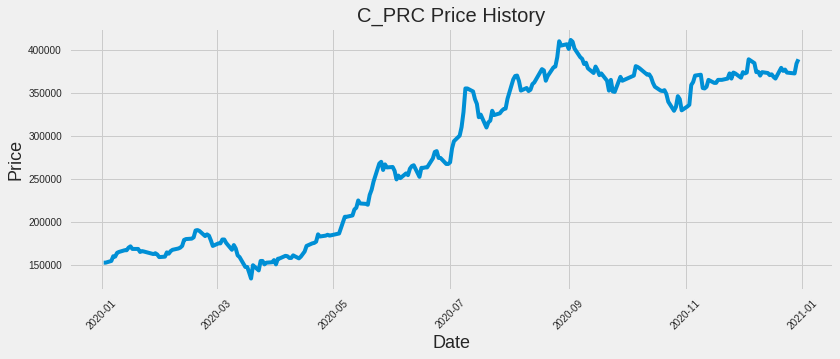

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['C_PRC'], label='C_PRC')
plt.xticks(rotation=45)
plt.title('C_PRC Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [ ]:
OBV = []
OBV.append(0)
for i in range(1, len(df.C_PRC)):
  if df.C_PRC[i] > df.C_PRC[i-1]:
    OBV.append(OBV[-1] + df.VOL[i])
  elif df.C_PRC[i] < df.C_PRC[i-1]:
    OBV.append(OBV[-1] - df.VOL[i])
  else:
    OBV.append(OBV[-1])

df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(com=20).mean()
df

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal,s3,s7,OBV,OBV_EMA
DT,,,,,,,,,,,,,,,,,,
2020-01-02,035720,152500,154000,154500,152000,241047,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,0,0.000000e+00
2020-01-03,035720,152500,153500,155000,151000,314848,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,0,0.000000e+00
2020-01-06,035720,154500,150500,155000,150000,393715,2000.0,2000.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,393715,1.376910e+05
2020-01-07,035720,160000,155000,160000,154500,840186,5500.0,5500.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,1233901,4.321140e+05
2020-01-08,035720,159500,158500,162000,156500,851619,-500.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,382282,4.211522e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,035720,377500,381000,385500,377000,629952,1500.0,1500.0,0.0,2500.000000,2250.0,1.111111,0.526316,0.504958,0.3,0.7,49425308,4.940764e+07
2020-12-24,035720,374000,378500,380000,372000,465132,-3500.0,0.0,3500.0,1392.857143,2500.0,0.557143,0.357798,0.484083,0.3,0.7,48960176,4.938634e+07
2020-12-28,035720,373000,374500,377000,369500,646464,-1000.0,0.0,1000.0,1392.857143,2250.0,0.619048,0.382353,0.469939,0.3,0.7,48313712,4.933526e+07


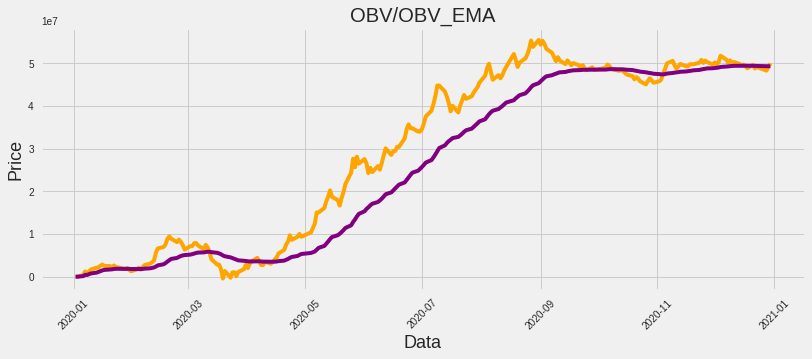

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['OBV'], label='OBV', color='orange')
plt.plot(df['OBV_EMA'], label='OBV_EMA', color = 'purple')
plt.xticks(rotation=45)
plt.title('OBV/OBV_EMA')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

매수 / 매도 타이밍 신호 찾는 함수 생성
- 매수 신호: OBV > OBV_EMA
- 매도 신호: OBV < OBV_EMA

In [ ]:
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal[col1][i] > signal[col2][i] and flag != 1:
      sigPriceBuy.append(signal['C_PRC'][i])
      sigPriceSell.append(np.nan)
      flag = 1
    
    elif signal[col1][i] < signal[col2][i] and flag != 0:
      sigPriceSell.append(signal['C_PRC'][i])
      sigPriceBuy.append(np.nan)
      flag = 0

    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [ ]:
x = buy_sell(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
df

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal,s3,s7,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
DT,,,,,,,,,,,,,,,,,,,,
2020-01-02,035720,152500,154000,154500,152000,241047,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,0,0.000000e+00,NaN,NaN
2020-01-03,035720,152500,153500,155000,151000,314848,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,0,0.000000e+00,NaN,NaN
2020-01-06,035720,154500,150500,155000,150000,393715,2000.0,2000.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,393715,1.376910e+05,154500.0,NaN
2020-01-07,035720,160000,155000,160000,154500,840186,5500.0,5500.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,1233901,4.321140e+05,NaN,NaN
2020-01-08,035720,159500,158500,162000,156500,851619,-500.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7,382282,4.211522e+05,NaN,159500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,035720,377500,381000,385500,377000,629952,1500.0,1500.0,0.0,2500.000000,2250.0,1.111111,0.526316,0.504958,0.3,0.7,49425308,4.940764e+07,377500.0,NaN
2020-12-24,035720,374000,378500,380000,372000,465132,-3500.0,0.0,3500.0,1392.857143,2500.0,0.557143,0.357798,0.484083,0.3,0.7,48960176,4.938634e+07,NaN,374000.0
2020-12-28,035720,373000,374500,377000,369500,646464,-1000.0,0.0,1000.0,1392.857143,2250.0,0.619048,0.382353,0.469939,0.3,0.7,48313712,4.933526e+07,NaN,NaN


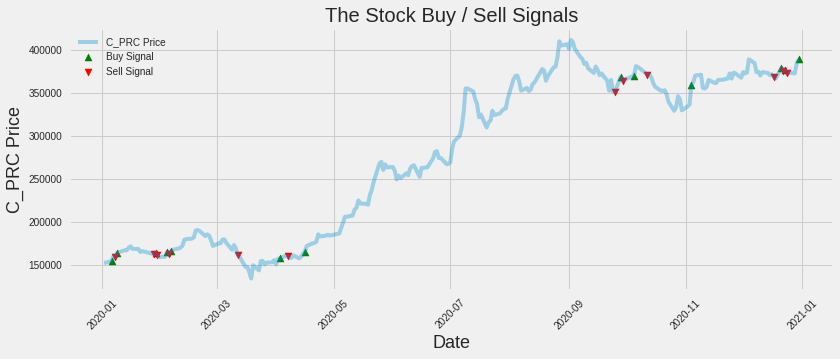

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green',
            label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red',
            label = 'Sell Signal', marker = 'v', alpha = 1)
plt.plot(df['C_PRC'], label='C_PRC Price', alpha = 0.35)
plt.xticks(rotation = 45)
plt.title('The Stock Buy / Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('C_PRC Price', fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()